In [70]:
%load_ext autoreload
%autoreload 2
from mrf import imtools
import os
from astropy.io import fits
from mrf.celestial import Celestial
import numpy as np
from mrf.display import display_single, SEG_CMAP
from astropy.table import Table, Column

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
hires_3 = fits.open('./_hires_3.fits')[0].data.byteswap().newbyteorder()
hdr = fits.open('./_hires_3.fits')[0].header

In [51]:
from mrf.utils import extract_obj

# Detect 1498 objects


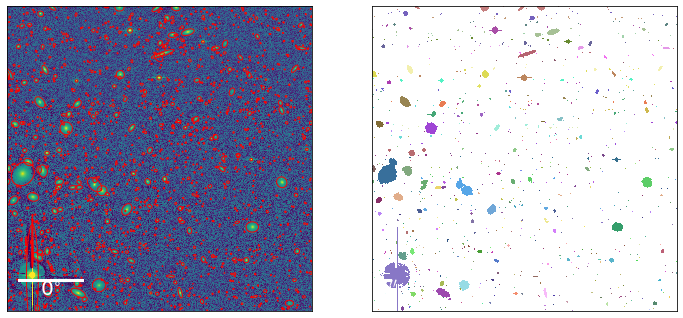

In [52]:
objects, segmap = extract_obj(hires_3, b=64, f=3, sigma=2.5, minarea=3, 
                              show_fig=True, flux_aper=[3, 6], 
                              deblend_nthresh=32, 
                              deblend_cont=5e-4)
objects.write('_hires_obj_cat.fits', format='fits', overwrite=True)

In [168]:
10**((24 - 27)/(-2.5)) * (2.5)**2

99.05582452881958

In [185]:
fluxmod = fits.open('_hires_fluxmod.fits')[0].data
kernel = fits.open('kernel_median.fits')[0].data
im_hires = fits.open('_df_model_3.0.fits')[0].data

E = fluxmod / im_hires
E *= np.sum(kernel)

In [186]:
ratio

array([0.        , 0.        , 0.26787074, ..., 0.13532615, 0.03410883,
       0.21426929])

In [187]:
flux = []
ratio = []
im_seg_ind = np.where(segmap>0)
im_seg_slice = segmap[im_seg_ind]
im_ratio = E
im_ratio_slice = im_ratio[im_seg_ind]
im_highres_slice = hires_3[im_seg_ind]

for obj in objects:
    ind = np.where(np.isin(im_seg_slice, obj['index']))
    flux_hires = im_highres_slice[ind]
    flux_ratio = im_ratio_slice[ind]
    flux.append(np.mean(flux_hires))
    ratio.append(np.mean(flux_ratio))
flux = np.array(flux)
ratio = np.array(ratio)
ratio = ratio[ratio != 0]

In [188]:
import matplotlib.pyplot as plt

In [197]:
np.sum(ratio > 1)

69

In [195]:
len(ratio)

436

(array([  4., 402.,  26.,   3.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-3.53421289, -0.75495052,  2.02431185,  4.80357421,  7.58283658,
        10.36209895, 13.14136132, 15.92062369, 18.69988606, 21.47914843,
        24.2584108 ]),
 <a list of 10 Patch objects>)

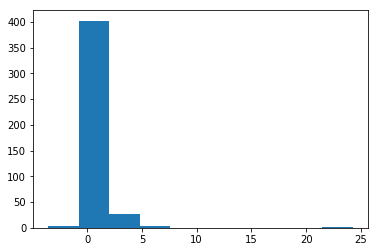

In [191]:
plt.hist(ratio[~np.isnan(ratio)])

In [140]:
E

0.37225615402184

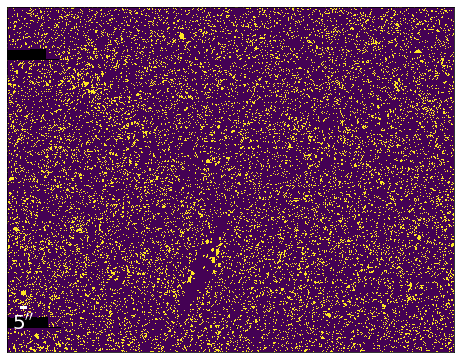

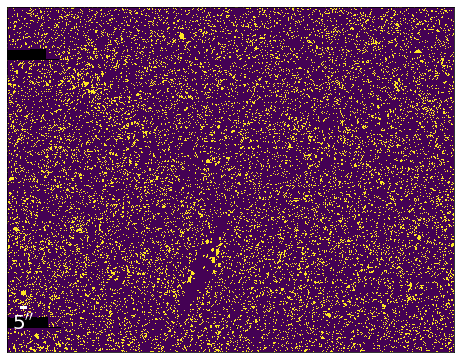

In [142]:
display_single(E)

In [86]:
from mrf.utils import mask_remove_obj, mask_out_certain_galaxy, seg_remove_obj

In [87]:
import copy

In [92]:
test = copy.deepcopy(segmap)
for obj in objects[np.where(mag < 17.5)]:
    test = seg_remove_obj(test, obj['x'], obj['y'])

In [93]:
ra = Column(data=[194.805008, 194.813726, 194.6502971, 194.6937727, 194.8177801], name='ra')
dec = Column(data=[27.97694499, 27.97054081, 27.87287833, 27.98150418, 27.89141156], name='dec')

In [94]:
Table([ra, dec]).write('./gal_cat.txt', format='ascii')

In [95]:
gal_cat = Table.read('./gal_cat.txt', format='ascii')

In [96]:
testest = mask_out_certain_galaxy(test, hdr, gal_cat=gal_cat)

### Removing object 0 from mask ###
### Removing object 638 from mask ###
### Removing object 1100 from mask ###
### Removing object 569 from mask ###
### Removing object 991 from mask ###


In [111]:
test = fits.open('_hires_fluxmod.fits')[0].data

In [114]:
fits.open('./n5907_df_r.fits')[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -64 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1199 / Axis length                                    
NAXIS2  =                  926 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2019-06-12T02:11:04' / Date FITS file was generated                  
IRAF-TLM= '2019-06-12T02:11:03' / Time of last modification                     
CTYPE1  = 'RA---TAN'                                                            
CRPIX1  =                522.5                                                  
CRVAL1  =              228.975                                                  
CTYPE2  = 'DEC--TAN'        

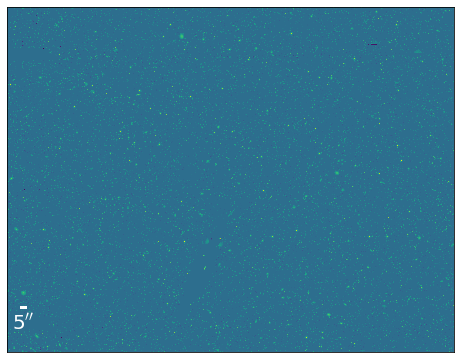

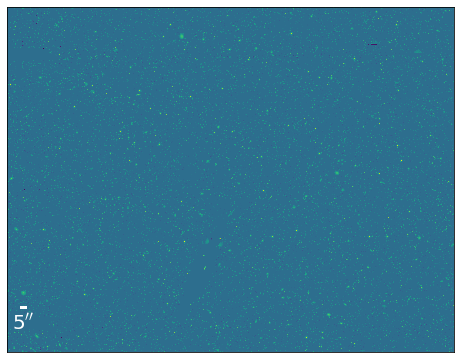

In [112]:
display_single(test, scale='linear')

thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,x2,y2,xy,errx2,erry2,errxy,a,b,theta,cxx,cyy,cxy,cflux,flux,cpeak,peak,xcpeak,ycpeak,xpeak,ypeak,flag,index,flux_max,fwhm_custom,flux_auto,kron_rad,flux_aper_1,flux_aper_2,flux_ann
float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64
4.143368721008301,2776,2640,363,444,71,130,402.3051851924926,101.50367397048406,101.02276252391493,42.40431150888867,-34.829751515187354,0.0001125282608981096,4.9300887730635725e-05,-4.1279513705103475e-05,10.82748031616211,5.117885112762451,-0.4356289207935333,0.013809379190206528,0.032899051904678345,0.022685300558805466,165870.25,166039.03125,2750.01611328125,3694.673828125,403,101,403,101,1,115,184635.71594128155,19.941521982888283,46589.54669189453,1.2074258155068103,46300.87441894532,84346.28808654785,38045.41366760255
4.143368721008301,2633,2501,1356,1421,447,501,1389.2292031750314,474.9849810289408,78.69339931231184,53.510000691381606,-0.3411082052510892,0.0001811578077852349,0.00011859933036703952,6.298207778284795e-07,8.871190071105957,7.314737319946289,-0.013541650958359241,0.012707897461950779,0.018688611686229706,0.00016201712423935533,102130.625,102267.0,2033.5106201171875,3162.813720703125,1389,475,1389,475,0,441,107698.02168320269,19.145381765704506,28791.998413085938,1.242544050965866,27440.345537109377,48438.37942474365,20998.03388763428
4.143368721008301,17476,16115,21,300,0,503,142.4220058445922,190.43654424646007,69.96344973270607,5575.317894132342,-12.748353516428324,5.582537432315098e-07,9.261729992503407e-07,-3.5586061878885695e-09,74.66825103759766,8.362650871276855,-1.5684807300567627,0.014299134723842144,0.00017943672719411552,6.539194146171212e-05,11832927.0,11681841.0,10154.978515625,11194.1005859375,133,201,134,202,1,443,15629142.614226196,125.10813009618437,292952.736328125,1.3435069589555186,259246.68414062506,706273.2205822753,447026.53644165053
4.143368721008301,221,181,141,144,289,359,142.49534627271998,326.9616071115816,0.588810149532514,371.98983832983276,0.4471417834934286,3.3283165902018914e-10,1.1530750040347517e-07,1.3361148963729e-10,19.287052154541016,0.7669888138771057,1.5695923566818237,1.6998919248580933,0.002690701512619853,-0.004086631815880537,1357423.125,1485343.25,8900.119140625,11225.595703125,142,306,142,344,1,444,6188507.034151345,32.14043202092787,370958.4488367401,3.2515990084553525,129739.72234963416,260935.46604883161,131195.7436991975
4.143368721008301,478,336,141,144,359,485,142.51265341743664,385.820683800898,0.7302639799225368,1270.8814625379273,-5.037038245495594,4.4376555537091116e-10,8.590771162808257e-07,-2.422516948835829e-11,35.64970397949219,0.8427863717079163,-1.5668307542800903,1.4078556299209595,0.0008089710609056056,0.011159849353134632,1874342.75,1895253.125,8670.5986328125,11803.5458984375,143,404,143,403,1,445,11200491.65890895,59.377236467396024,360043.992413491,3.192323643187075,132124.97328608512,267703.8992894709,135578.92600338577
4.143368721008301,1799,1754,519,569,651,701,537.2774042325685,680.7192330013113,50.48253719916909,48.88306777578646,1.9652060046794304,6.682729994108955e-05,6.997928084252795e-05,6.89194738523992e-06,7.197534561157227,6.896455764770508,0.592157781124115,0.019839879125356674,0.020489046350121498,-0.0015952129615470767,111656.5859375,111593.1171875,1647.632080078125,2009.732177734375,537,681,537,681,1,636,168187.73239936717,16.598191414311724,39356.263610839844,1.5909106208836317,29073.01509155274,56862.46687927247,27789.45178771972
4.143368721008301,9163,8710,29,141,717,844,88.18989948143894,775.4864412218856,266.70751054294396,275.54234337725575,47.37432748484662,0.0001938425109325574,0.00020601597123909039,4.358549091060069e-05,17.852304458618164,14.951424598693848,0.8318862318992615,0.003867538645863533,0.0037435321137309074,

In [12]:
hdu = fits.open('./df_field_r.fits')
df = Celestial(hdu[0].data, header=hdu[0].header)

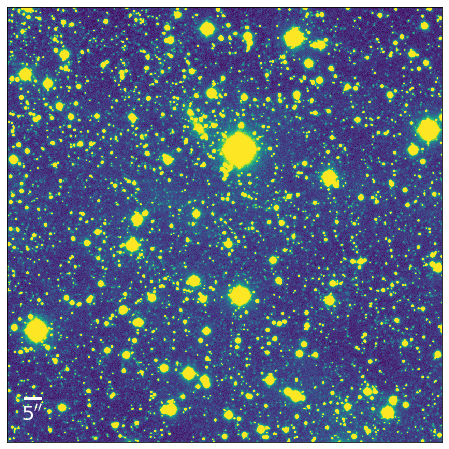

In [8]:
df.display_image()

In [9]:
df.resize_image(3, method='iraf')

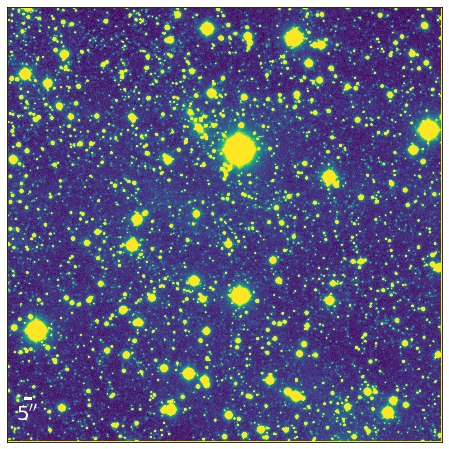

In [10]:
df.display_image()

In [13]:
df.image.shape

(840, 840)